# 1

خیلی نوشتن و یکی کردن ضرایب زیاد بود. رفتم فرمولش رو دیدم و مستقیم نوشتم

In [75]:
import numpy as np

In [77]:
data= np.loadtxt('/content/drive/MyDrive/simul exercises/ex8/dataprofile.txt')
# data

In [86]:
h=1
x= data[:,0]
f= data[:,1]
lens= len(f)

def central_difference(f, h, order):
  f_prim=[]
  lens= len(f)

  if order == 3:
    for x in range(order,lens-order):
     a= (-f[x+2*h] + 2*f[x+h] - 2*f[x-h] + f[x-2*h]) / (2 * h**3)
     f_prim.append(a)

  elif order == 5:
    for x in range(order,lens-order):
      a= (f[x+3*h] - 6*f[x+2*h] + 15*f[x+h] - 20*f[x] +
        15*f[x-h] - 6*f[x-2*h] + f[x-3*h]) / (2 * h**5)
      f_prim.append(a)

  elif order == 7:
      for x in range(order,lens-order):
        a= (-f[x+4*h] + 8*f[x+3*h] - 30*f[x+2*h] +
                80*f[x+h] - 80*f[x-h] + 30*f[x-2*h] -
                8*f[x-3*h] + f[x-4*h]) / (2 * h**7)
        f_prim.append(a)

  elif order == 9:
    for x in range(order,lens-order):
      a= (f[x+5*h] - 10*f[x+4*h] + 45*f[x+3*h] -
              120*f[x+2*h] + 210*f[x+h] - 252*f[x] +
              210*f[x-h] - 120*f[x-2*h] + 45*f[x-3*h] -
              10*f[x-4*h] + f[x-5*h]) / (2 * h**9)
      f_prim.append(a)

  return(f_prim)




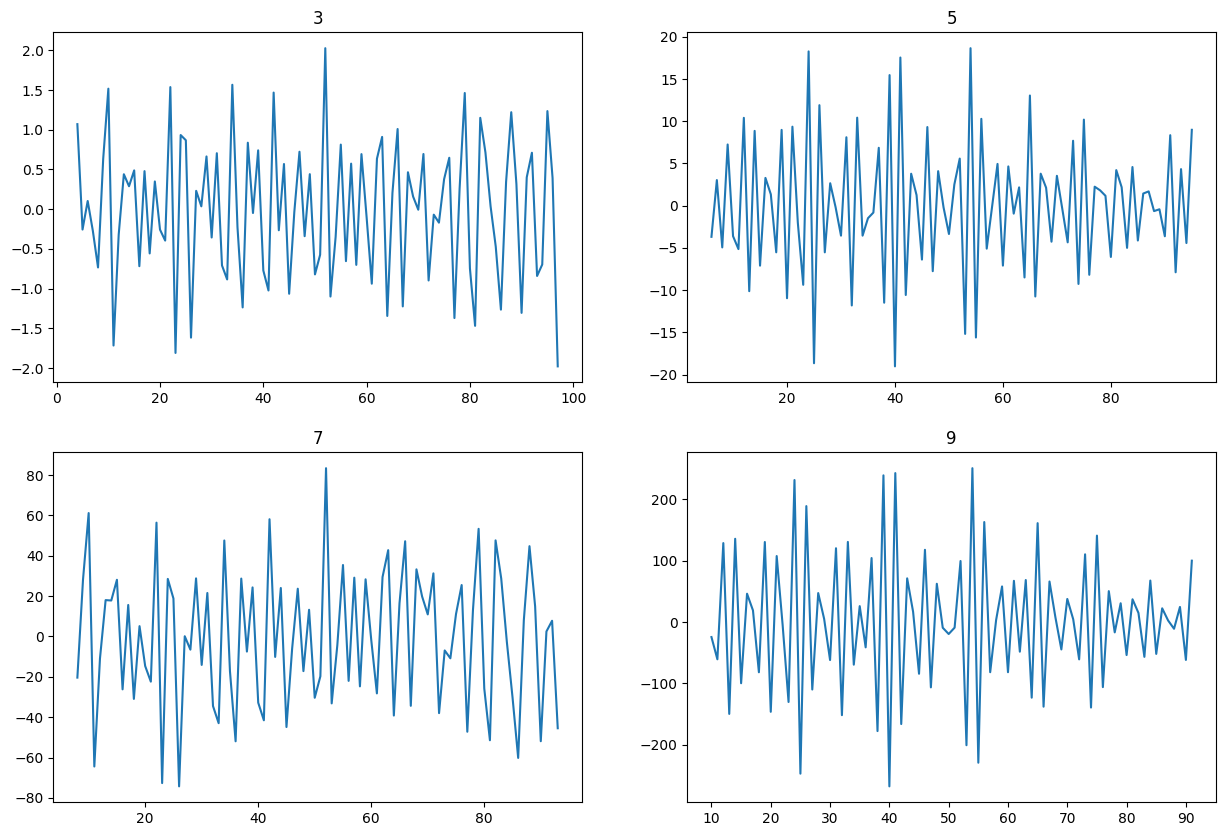

In [91]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
ax = ax.flatten()

for i in range(4):
    order= 3+2*i
    f_prim = central_difference(f, h, order)
    # print(f"{order}th order derivatives : {approx_deriv}")
    ax[i].plot(x[order:lens-order],f_prim)
    ax[i].set_title(f'{order}')

# 2

## A

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [38]:
def explicit(dx,N,f0):
  f= np.zeros(N)
  f[0]=f0
  for n in range(N-1):
    f[n+1]= f[n]+ dx*( f[n]**2 )
    if f[n]-f[n-1]>10**40:
      f= f[:n]
      break

  x= [1+dx*i for i in range(n)]
  return x,f,n

# این بخاطر میزون نبودن دی ایکس کار نمیکنه. هرکاری هم کردم خوب نشد شکلش لهذا راه بعدی
# def implicit(dx,N,f0):
#   f= np.zeros(N)
#   f[0]=f0
#   for n in range(N-2):
#     # f[n+1]= f[n]+ dx*( f[n+1]**2 )
#     delta= 1-4*dx*f[n]
#     if delta<0:
#       a= (1+1j*cmath.sqrt(delta)).real/(2*dx)
#     else:
#       a = (1+np.sqrt(delta))/(2*dx)
#     print(a)
#     f[n+1]=a

#   x= [1+dx*i for i in range(N)]
#   return x,f,n



def implicit(dx,N,f0):
  f= np.zeros(N)
  f[0]=f0
  for n in range(N-2):
    # f[n+1]= f[n]+ dx*( f[n+1]**2 )
    dx= 1/(4*f[n]) #بیشتر از این بشه منفی میشه جواب کلا
    delta= 1-4*dx*f[n]
    f[n+1] = (1+np.sqrt(delta))/(2*dx)

  x= [1+dx*i for i in range(N)]
  return x,f,n

# ----------------------------------------------------------------
# from scipy.optimize import fsolve
# import numpy as np

# اینو از هوش مصنوعی پرسیدم و جدی باید گار کنه ولی نمیکنه
# و سایپای نمیتونه حلش کنه!

# def implicit(dx, N, f0):
#     f = np.zeros(N + 1)  # Array to store values of f
#     f[0] = f0           # Initial condition

#     # Define the implicit equation
#     def equation(f_next, f_current, dx):
#         return f_next - f_current - dx * f_next**2

#     # Time-stepping loop
#     for n in range(N-1):
#         f_guess = f[n]  # Initial guess
#         f[n + 1] = fsolve(equation, f_guess, args=(f[n], dx))[0]

#         # Check for instability or divergence
#         if abs(f[n + 1]) > 1e20:  # Arbitrary large value as a cutoff
#             print("Divergence detected!")
#             return f[:n + 1], n  # Return computed values up to divergence

#     # Create the time array
#     x= [1+dx*i for i in range(n)]
#     return x, f, N


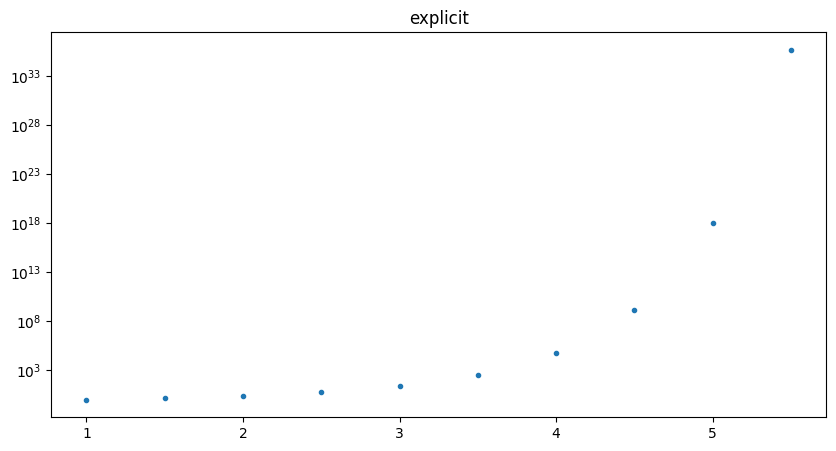

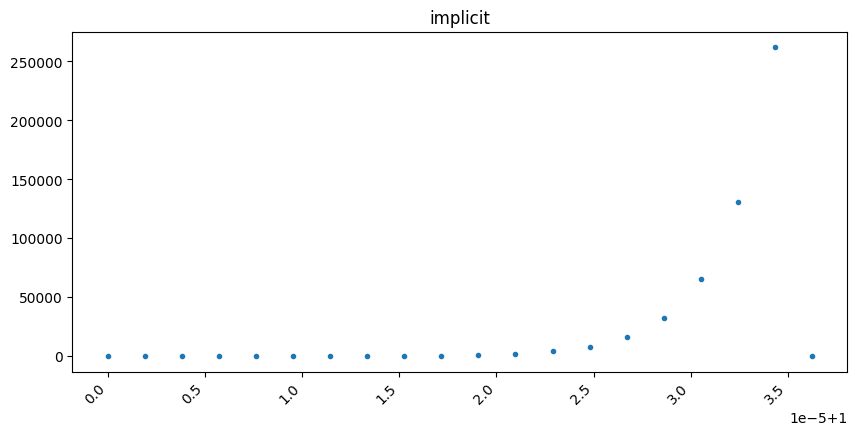

In [54]:
dx= 0.5
N= 20
f0= 1

x,f,n= explicit(dx,N,f0)
fig,ax= plt.subplots(figsize=(10,5))
ax.plot(x,f,'.')
ax.set_yscale('log')
ax.set_title('explicit')
plt.show()

x,f,n= implicit(dx,N,f0)
fig,ax= plt.subplots(figsize=(10,5))
ax.plot(x,f,'.')
# ax.set_yscale('log')
ax.set_title('implicit')
# ax.set_xticks(rotation=25)
fig.autofmt_xdate(rotation=45)
plt.show()

## B

In [58]:
def explicit(dx,N,f0):
  f= np.ones(N)*f0
  for n in range(N-1):
    f[n+1]= f[n]+ dx*(-f[n])

  x= [1+dx*i for i in range(N)]
  return x,f,n

def implicit(dx,N,f0):
  f= np.zeros(N)
  f[0]=f0
  for n in range(N-2):
    # f[n+1]= f[n]+ dx*-f[n+1]
    f[n+1]=f[n]/(1+dx)

  x= [1+dx*i for i in range(N)]
  return x,f,n




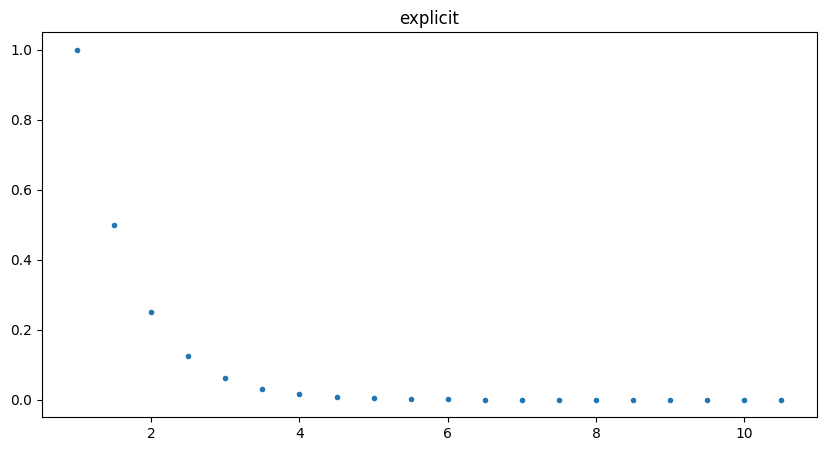

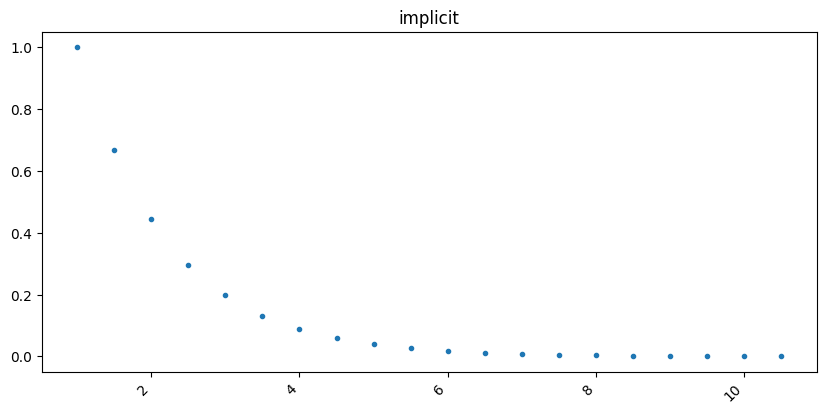

In [60]:
dx= 0.5
N= 20
f0= 1


x,f,n= explicit(dx,N,f0)
fig,ax= plt.subplots(figsize=(10,5))
ax.plot(x,f,'.')
# ax.set_yscale('log')
ax.set_title('explicit')
plt.show()

x,f,n= implicit(dx,N,f0)
fig,ax= plt.subplots(figsize=(10,5))
ax.plot(x,f,'.')
# ax.set_yscale('log')
ax.set_title('implicit')
# ax.set_xticks(rotation=25)
fig.autofmt_xdate(rotation=45)
plt.show()

# 3

## a

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

In [10]:
# y''(t) + a*y'(t) + ω**2*y(t) = cos(ω1t)
#Y'(t) + a*Y(t)+ ω**2*y(t) = cos(ω1t)
# y(0)=0  y'(0)=0
#RFK4 : y(x+dx) = y(x) + dx/6 * [k1+2k2+2k3+k4]

# def k(n1,n2): وقت نکردم تمیز ترش کنم


def Rk4(dx,N,a,omega,omega1,A):
  x=0
  y= np.zeros(N)
  y[0]= A
  y_p= np.zeros(N)
  y_p[0]=0

  for i in range(N-1):
    k11= y_p[i]
    k12= np.cos(omega1*x)-omega**2*y[i]-a*y_p[i]

    k21= y_p[i]+dx/2*k11
    k22= np.cos(omega1*(x+dx/2))-omega**2*(y[i]+dx/2*k11)-a*(y_p[i]+dx/2*k12)

    k31= y_p[i]+dx/2*k21
    k32= np.cos(omega1*(x+dx/2))-omega**2*(y[i]+dx/2*k21)-a*(y_p[i]+dx/2*k22)

    k41= y_p[i]+dx/2*k21
    k42= np.cos(omega1*(x+dx))-omega**2*(y[i]+dx*k31)-a*(y_p[i]+dx*k32)

    y[i+1]= y[i] + dx/6*(k11+2*k21+2*k31+k41)
    y_p[i+1]= y_p[i] + dx/6*(k12+2*k22+2*k32+k42)

    x=x+dx

  return y_p,y



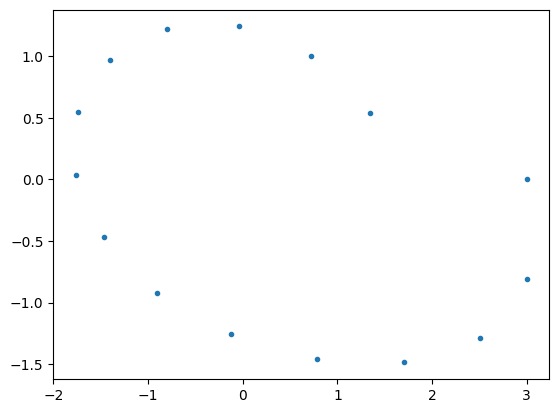

In [70]:
dx= .5
A= 3
a= 1
omega= 1
omega1= 1
N=15

y_p,y= Rk4(dx,N,a,omega,omega1,A)
plt.plot(y,y_p,'.')

## b

In [ ]:
# y''(t) + a*y'(t) + ω**2*y(t) = cos(ω1t)

In [51]:
from scipy.integrate import odeint
from sympy import Function, dsolve, Derivative, checkodesol,cos
from sympy import Symbol

In [55]:
A= 3
a= 1
omega= 1
omega1= 1

def function_y(z, t): #z[1]=y' z[0]=y
    return [z[1], np.cos(omega1*t)-omega**2*z[0]-a*z[1]]

In [64]:
time= np.arange(-5,3,.5)

In [65]:
solution = odeint(function_y, [A, 0], time)
ys = solution[:, 0]
y_ps = solution[:, 1]

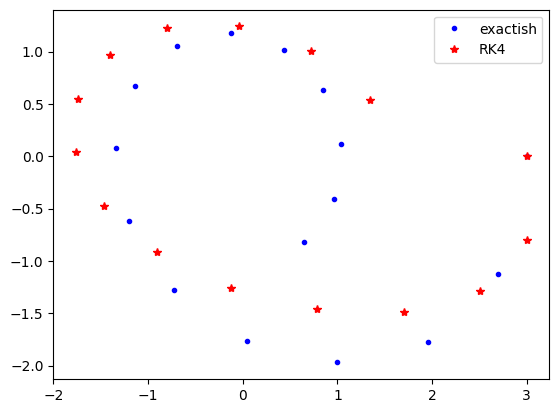

In [74]:
plt.plot(ys, y_ps,'b.',label='exactish')
plt.plot(y,y_p,'r*',label='RK4')
plt.legend()